Initial dataset sample:
   Time Protcol Flag    Family  Clusters SeddAddress ExpAddress  BTC  USD  \
0    50     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  500   
1    40     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  504   
2    30     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  508   
3    20     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  512   
4    57     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  516   

   Netflow_Bytes IPaddress Threats  Port Prediction  
0              5         A   Bonet  5061         SS  
1              8         A   Bonet  5061         SS  
2              7         A   Bonet  5061         SS  
3             15         A   Bonet  5061         SS  
4              9         A   Bonet  5061         SS  
Columns: ['Time', 'Protcol', 'Flag', 'Family', 'Clusters', 'SeddAddress', 'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats', 'Port', 'Prediction']

Unique Dataset Info:
<c

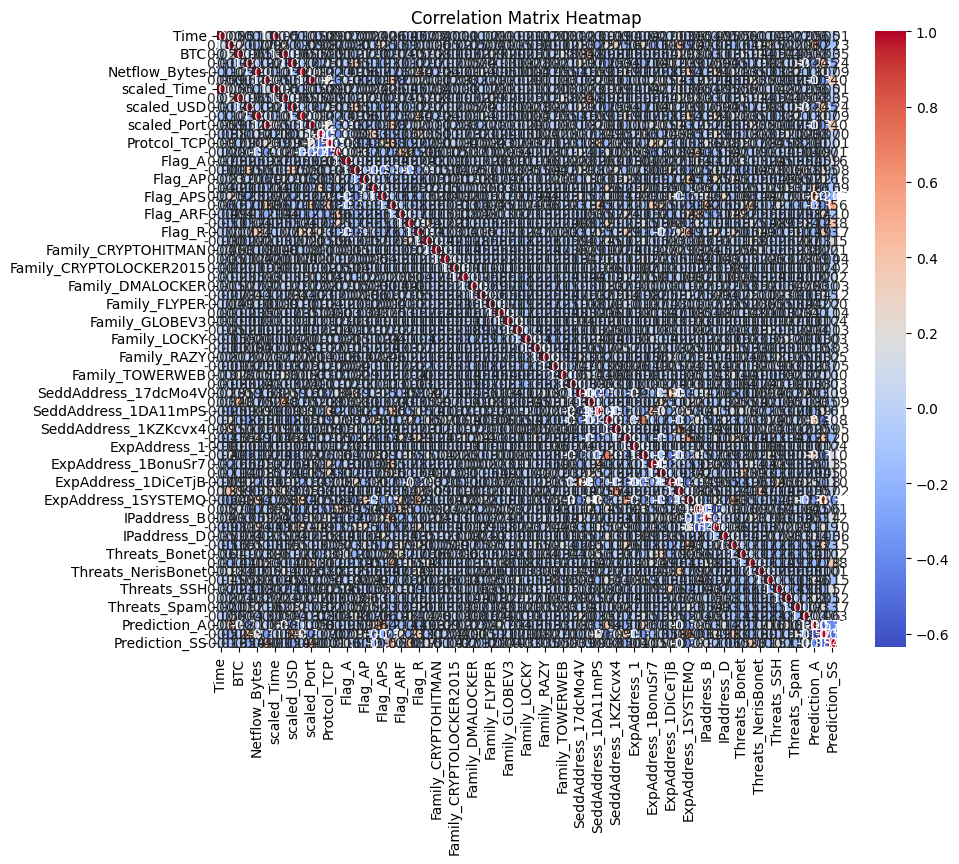

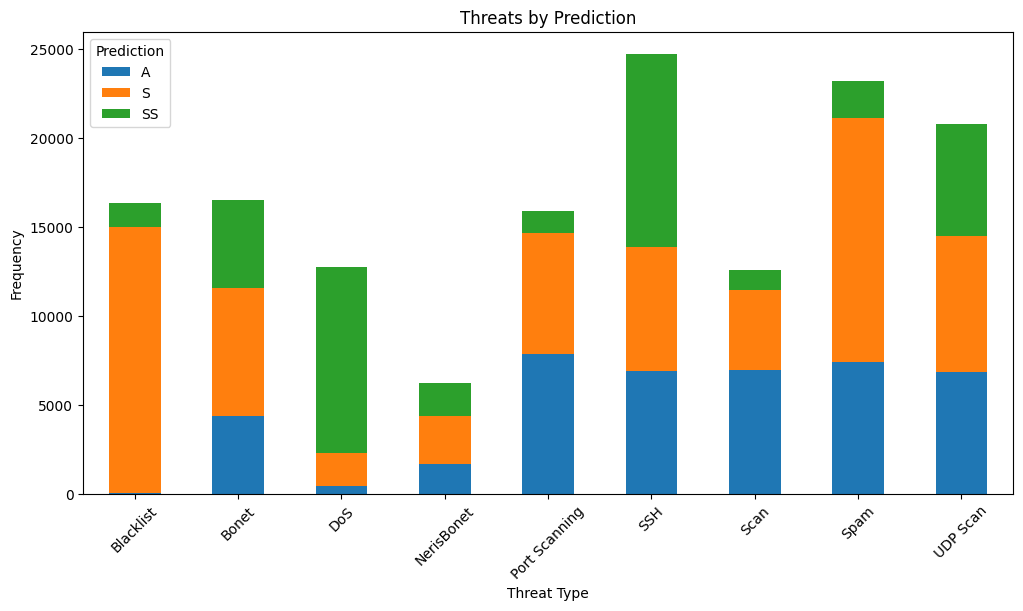

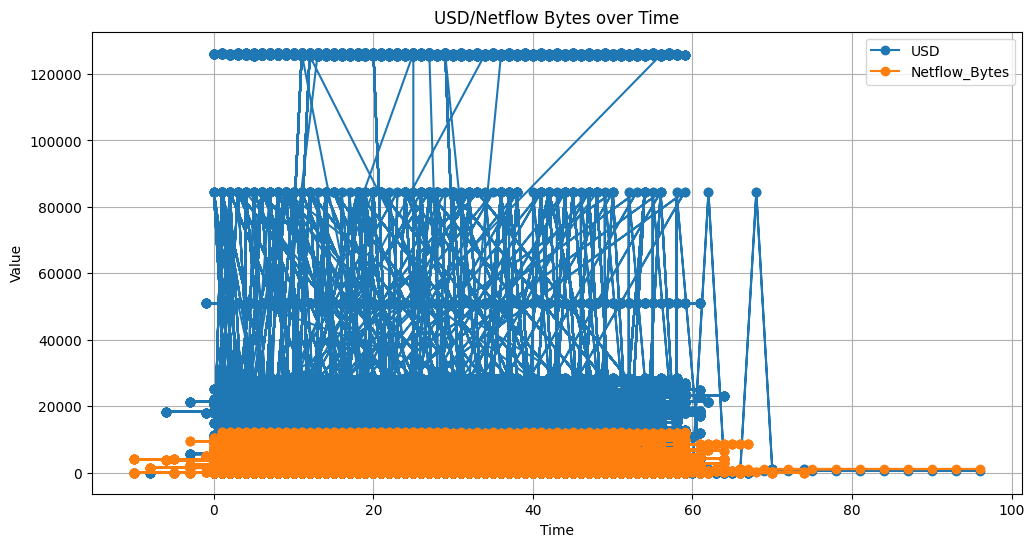

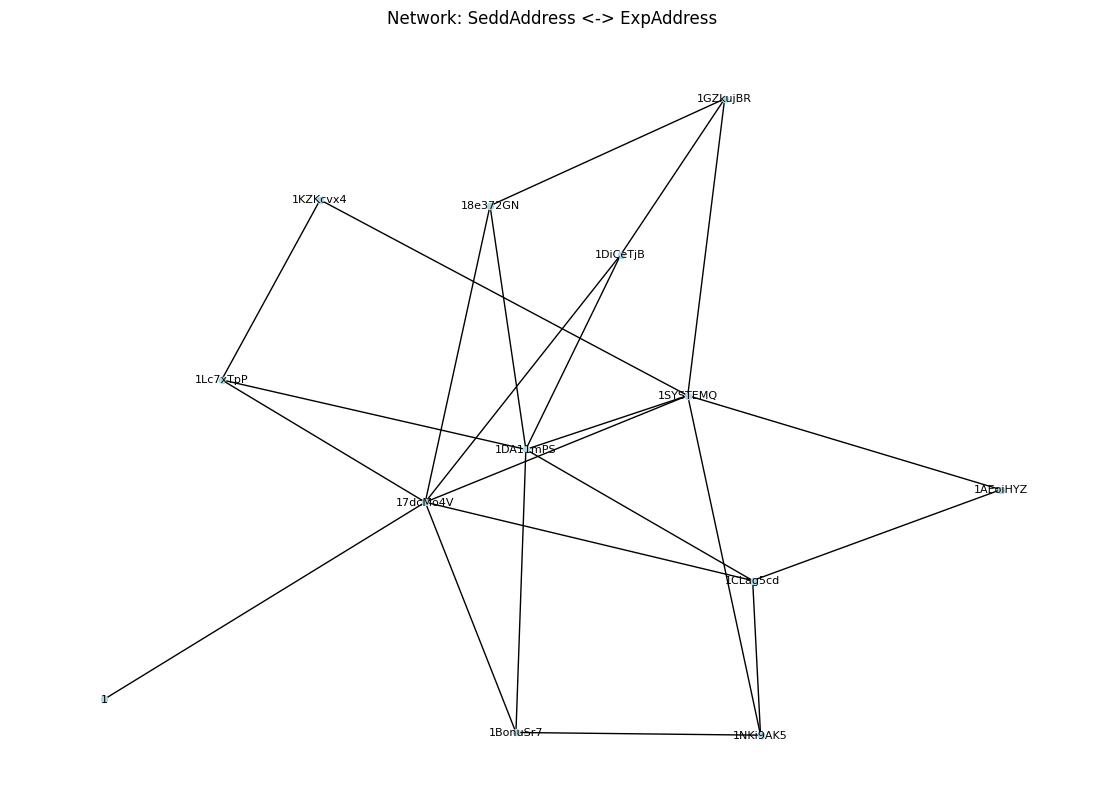


Class Distribution (is_threat):
is_threat
0    132520
1     16523
Name: count, dtype: int64
is_threat
0    0.889139
1    0.110861
Name: proportion, dtype: float64

Dummy classifier accuracy (most frequent label): 0.8891373873370161

Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39756
           1       1.00      1.00      1.00      4957

    accuracy                           1.00     44713
   macro avg       1.00      1.00      1.00     44713
weighted avg       1.00      1.00      1.00     44713

Epoch 1/3
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8848 - loss: 0.9364 - val_accuracy: 0.8895 - val_loss: 0.3475
Epoch 2/3
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8867 - loss: 0.3535 - val_accuracy: 0.8895 - val_loss: 0.3475
Epoch 3/3
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8892 - loss: 0.3483 - val_accuracy: 0.8895 - val_loss: 0.3475

Neur

In [ ]:
!pip install fpdf2
from fpdf import FPDF
import matplotlib.pyplot as plt
import pandas as pd
import io
import numpy as np
import seaborn as sns
import networkx as nx
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.dummy import DummyClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import warnings

warnings.filterwarnings("ignore")

def generate_pdf_report(report_svc, report_nn, accuracy_svc, accuracy_nn, cm_svc, cm_nn):
    """
    Generates a PDF report from the ransomware classification results.

    This function is called after your model training and evaluation
    are complete, passing in the actual results as arguments.

    Args:
        report_svc (str): The classification report for the SVC model.
        report_nn (str): The classification report for the Neural Network model.
        accuracy_svc (float): The accuracy score for the SVC model.
        accuracy_nn (float): The accuracy score for the Neural Network model.
        cm_svc (np.ndarray): The confusion matrix for the SVC model.
        cm_nn (np.ndarray): The confusion matrix for the Neural Network model.
    """
    # Create an FPDF object
    pdf = FPDF()
    pdf.add_page()

    # --- Add a title to the PDF ---
    pdf.set_font("Arial", "B", 16)
    pdf.cell(200, 10, txt="Ransomware Classification Report", ln=True, align="C")
    pdf.ln(10)

    # --- Add classification report text outputs ---
    pdf.set_font("Arial", "B", 12)
    pdf.cell(200, 10, txt="Classification Reports", ln=True)
    pdf.set_font("Arial", "", 10)

    pdf.multi_cell(0, 5, txt="Random Forest Classifier:\n" + report_svc)
    pdf.ln(5)

    pdf.multi_cell(0, 5, txt="Neural Network:\n" + report_nn)

    # --- Add a table of accuracy scores ---
    pdf.ln(10)
    pdf.set_font("Arial", "B", 12)
    pdf.cell(200, 10, txt="Model Accuracies", ln=True)

    accuracy_data = {
        "Model": ["Random Forest", "Neural Network"],
        "Accuracy": [f"{accuracy_svc:.2f}", f"{accuracy_nn:.2f}"]
    }
    df_accuracy = pd.DataFrame(accuracy_data)

    # Convert dataframe to a string representation for the PDF
    accuracy_table_string = df_accuracy.to_string(index=False)
    pdf.set_font("Courier", "", 10)  # Use monospace font for table alignment
    pdf.multi_cell(0, 5, txt=accuracy_table_string)

    # --- Add confusion matrix plots as images ---
    def plot_confusion_matrix(cm, model_name):
        plt.figure(figsize=(6, 6))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.colorbar()
        plt.xticks(np.arange(cm.shape[1]), ['Legitimate', 'Ransomware'])
        plt.yticks(np.arange(cm.shape[0]), ['Legitimate', 'Ransomware'])
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        # Save the plot to a BytesIO object instead of a file
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        plt.close()  # Close the figure to free up memory
        return buf

    pdf.add_page()
    pdf.set_font("Arial", "B", 12)
    pdf.cell(200, 10, txt="Confusion Matrices", ln=True)

    # Add Random Forest confusion matrix
    buf_rf = plot_confusion_matrix(cm_svc, "Random Forest")
    pdf.image(buf_rf, x=50, y=None, w=100)

    pdf.ln(10)

    # Add Neural Network confusion matrix
    buf_nn = plot_confusion_matrix(cm_nn, "Neural Network")
    pdf.image(buf_nn, x=50, y=None, w=100)

    # Save the PDF to a file
    pdf.output("ransomware_classification_report.pdf")
    print("PDF report 'ransomware_classification_report.pdf' generated successfully!")

# --- Main script starts here ---

# 1. LOAD DATA
data = pd.read_csv("ug_ransom_dataset.csv")
print("Initial dataset sample:")
print(data.head())
print("Columns:", data.columns.tolist())

# 2. DATA PROCESSING
df_unique = data.drop_duplicates()
if 'Family' in df_unique.columns:
    df_unique['Family'] = df_unique['Family'].str.upper()
print("\nUnique Dataset Info:")
print(df_unique.info())

# 3. FEATURE ENGINEERING
num_cols = ['Time', 'BTC', 'USD', 'Netflow_Bytes', 'Port']
for c in num_cols:
    if c in df_unique.columns:
        df_unique[c] = pd.to_numeric(df_unique[c], errors='coerce')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_unique[num_cols].fillna(0))
scaled_columns = [f"scaled_{col}" for col in num_cols]
scaled_df = pd.DataFrame(scaled_features, columns=scaled_columns, index=df_unique.index)

cat_cols = [col for col in df_unique.select_dtypes(include='object').columns
            if df_unique[col].nunique() < len(df_unique)//2]
print("\nCategorical columns to encode:", cat_cols)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df_unique[cat_cols].astype(str))
encoded_columns = encoder.get_feature_names_out(cat_cols)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns, index=df_unique.index)

transformed_df = pd.concat([df_unique, scaled_df, encoded_df], axis=1)
print("\nTransformed dataset sample:")
print(transformed_df.head())

# 4. CORRELATION MATRIX
numeric_df = transformed_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 5. STACKED BAR CHART IF POSSIBLE
if 'Threats' in transformed_df.columns and 'Prediction' in transformed_df.columns:
    chart = pd.crosstab(transformed_df['Threats'], transformed_df['Prediction'])
    chart.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Threats by Prediction')
    plt.xlabel('Threat Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.legend(title='Prediction')
    plt.show()

# 6. TIME SERIES (if Time column is present)
if 'Time' in data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(data['Time'], data['USD'], label='USD', marker='o')
    plt.plot(data['Time'], data['Netflow_Bytes'], label='Netflow_Bytes', marker='o')
    plt.title("USD/Netflow Bytes over Time")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# 7. SIMPLE NETWORK GRAPH (if columns present)
if 'SeddAddress' in data.columns and 'ExpAddress' in data.columns:
    G = nx.Graph()
    for idx, row in data.iterrows():
        G.add_edge(row['SeddAddress'], row['ExpAddress'])
    plt.figure(figsize=(14, 10))
    nx.draw_networkx(G, with_labels=True, node_size=20, font_size=8, node_color='lightblue')
    plt.title('Network: SeddAddress <-> ExpAddress')
    plt.axis('off')
    plt.show()

# 8. BINARY TARGET
if 'Threats' in transformed_df.columns:
    transformed_df['is_threat'] = (transformed_df['Threats'].astype(str).str.lower() == 'bonet').astype(int)
else:
    raise Exception("Column 'Threats' not found in your data!")

print("\nClass Distribution (is_threat):")
print(transformed_df['is_threat'].value_counts())
print(transformed_df['is_threat'].value_counts(normalize=True))

# 9. BASELINE DUMMY MODEL (so you understand maximum 'guessing' accuracy)
X = transformed_df[scaled_columns + list(encoded_columns)]
y = transformed_df['is_threat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print("\nDummy classifier accuracy (most frequent label):", dummy.score(X_test, y_test))

# 10. RANDOM FOREST MODEL
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\nRandom Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)

# 11. NEURAL NETWORK MODEL (adjustable for underfitting/overfitting)
model_nn = Sequential([
    Dense(2, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(1.0)),
    Dropout(0.95),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer=Adam(learning_rate=0.05), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

history = model_nn.fit(
    X_train, y_train,
    epochs=3,
    batch_size=512,
    validation_split=0.5,
    verbose=1,
    callbacks=[early_stop]
)

loss_nn, accuracy_nn = model_nn.evaluate(X_test, y_test, verbose=0)
y_pred_nn_prob = model_nn.predict(X_test, verbose=0)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int)
report_nn = classification_report(y_test, y_pred_nn)
cm_nn = confusion_matrix(y_test, y_pred_nn)

print(f"\nNeural Network Test Accuracy: {accuracy_nn*100:.2f}%")
print("Classification Report:\n", report_nn)

# 12. Final Inspection for Imbalance
print("\nFinal Class Distribution in Test Set:")
print(y_test.value_counts(), y_test.value_counts(normalize=True))

print("\nIf your dummy classifier and neural net accuracy are nearly the same, the dataset is highly imbalanced. Try balancing it for meaningful ML results.")

# 13. Generate the PDF report
print("\nGenerating PDF report...")
generate_pdf_report(
    report_svc=report_rf,
    report_nn=report_nn,
    accuracy_svc=accuracy_rf,
    accuracy_nn=accuracy_nn,
    cm_svc=cm_rf,
    cm_nn=cm_nn
)


In [ ]:
!pip install fpdf2
from fpdf import FPDF
import matplotlib.pyplot as plt
import pandas as pd
import io
import numpy as np
from sklearn.metrics import confusion_matrix

def generate_pdf_report(report_svc, report_nn, accuracy_svc, accuracy_nn, cm_svc, cm_nn):
    """
    Generates a PDF report from the ransomware classification results.

    This function should be called after your model training and evaluation
    are complete, passing in the actual results as arguments.

    Args:
        report_svc (str): The classification report for the SVC model.
        report_nn (str): The classification report for the Neural Network model.
        accuracy_svc (float): The accuracy score for the SVC model.
        accuracy_nn (float): The accuracy score for the Neural Network model.
        cm_svc (np.ndarray): The confusion matrix for the SVC model.
        cm_nn (np.ndarray): The confusion matrix for the Neural Network model.
    """
    # Create an FPDF object
    pdf = FPDF()
    pdf.add_page()

    # --- Add a title to the PDF ---
    pdf.set_font("Arial", "B", 16)
    pdf.cell(200, 10, txt="Ransomware Classification Report", ln=True, align="C")
    pdf.ln(10)

    # --- Add classification report text outputs ---
    pdf.set_font("Arial", "B", 12)
    pdf.cell(200, 10, txt="Classification Reports", ln=True)
    pdf.set_font("Arial", "", 10)

    pdf.multi_cell(0, 5, txt="Support Vector Classifier:\n" + report_svc)
    pdf.ln(5)

    pdf.multi_cell(0, 5, txt="Neural Network:\n" + report_nn)

    # --- Add a table of accuracy scores ---
    pdf.ln(10)
    pdf.set_font("Arial", "B", 12)
    pdf.cell(200, 10, txt="Model Accuracies", ln=True)

    accuracy_data = {
        "Model": ["SVC", "Neural Network"],
        "Accuracy": [f"{accuracy_svc:.2f}", f"{accuracy_nn:.2f}"]
    }
    df_accuracy = pd.DataFrame(accuracy_data)

    # Convert dataframe to a string representation for the PDF
    accuracy_table_string = df_accuracy.to_string(index=False)
    pdf.set_font("Courier", "", 10)  # Use monospace font for table alignment
    pdf.multi_cell(0, 5, txt=accuracy_table_string)

    # --- Add confusion matrix plots as images ---
    def plot_confusion_matrix(cm, model_name):
        plt.figure(figsize=(6, 6))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.colorbar()
        plt.xticks(np.arange(cm.shape[1]), ['Legitimate', 'Ransomware'])
        plt.yticks(np.arange(cm.shape[0]), ['Legitimate', 'Ransomware'])
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        # Save the plot to a BytesIO object instead of a file
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        plt.close()  # Close the figure to free up memory
        return buf

    pdf.add_page()
    pdf.set_font("Arial", "B", 12)
    pdf.cell(200, 10, txt="Confusion Matrices", ln=True)

    # Add SVC confusion matrix
    buf_svc = plot_confusion_matrix(cm_svc, "SVC")
    pdf.image(buf_svc, x=50, y=None, w=100)

    pdf.ln(10)

    # Add Neural Network confusion matrix
    buf_nn = plot_confusion_matrix(cm_nn, "Neural Network")
    pdf.image(buf_nn, x=50, y=None, w=100)

    # Save the PDF to a file
    pdf.output("ransomware_classification_report.pdf")
    print("PDF report 'ransomware_classification_report.pdf' generated successfully!")
